## Importing standard python dependencies

In [83]:
import os, requests, zipfile
import numpy as np
import pandas as pd
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Data Loading Strategy

- We use requests and zipfile modules to retrieve and extract the data on climate change from World Bank API.

- Two separate functions are defined for downloading and extracting data respectively. A joinery function is then defined for the two prior functions

In [32]:
# Define the remote file to retrieve the world bank data on climate change
climate_data_url = "https://api.worldbank.org/v2/en/topic/19?downloadformat=csv"

# The base path for all the files
base_path = os.getcwd()
# The path for storing the zip file for climate change data
storage_path = f"{base_path}/climate_data.tar.gz"

# We have make three functions:
1.   Get Data
2.   Extract Data from File
3.    Prepare Data from further analysis

In [33]:
def get_data(url):
    if not os.path.exists(storage_path):
        df = requests.get(url)
        with open(storage_path, 'wb')as file:
            file.write(df.content)

def extract_file(f_path):
    if not os.path.exists("API_19_DS2_en_csv_v2_4151283.csv"):
        with zipfile.ZipFile(f_path, "r") as zp:
            zp.extractall(base_path)

def prepare_data(url, f_path):
    get_data(url)
    extract_file(f_path)

prepare_data(climate_data_url, storage_path)

# Data Manipulation and EDA

- Using Pandas is a library for manipulating structured data for instance, series and dataframes. 

- Convert the csv data to a dataframe

In [87]:
df = pd.read_csv("climate_dataset.csv").drop(['Unnamed: 0'], axis=1)

In [88]:
df.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


In [89]:
df.columns

Index(['Country', 'Energy_type', 'Year', 'Energy_consumption',
       'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita',
       'Energy_intensity_by_GDP', 'CO2_emission'],
      dtype='object')

# Normalize dataset before making clustering so we get proper graph

In [90]:
dataset_feature = ['Energy_consumption','Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita','Energy_intensity_by_GDP', 'CO2_emission']
def normalize(df):
    result = df.copy()
    for feature_name in dataset_feature:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

df1 = normalize(df)

# Replacing Null and Infinitly values 

In [91]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)



In [93]:
df1.fillna(df1.mean(), inplace=True)

# Picking Record from last 30 Years 1990 to 2020

In [94]:
df1 = df1[df1['Year'] > 1989]
df1.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
13860,World,all_energy_types,1990,0.588333,0.585175,0.385541,0.686261,0.058613,0.043025,6.226970e-01
13861,World,coal,1990,0.159732,0.162076,0.385541,0.686261,0.058613,0.043025,2.587689e-01
13862,World,natural_gas,1990,0.125226,0.123809,0.385541,0.686261,0.058613,0.043025,1.103092e-01
13863,World,petroleum_n_other_liquids,1990,0.226707,0.222729,0.385541,0.686261,0.058613,0.043025,2.536192e-01
13864,World,nuclear,1990,0.034132,0.033290,0.385541,0.686261,0.058613,0.043025,1.441684e-07


# United Kingdom GDP in last 30 years vs United Kingdom Population in last 30 year

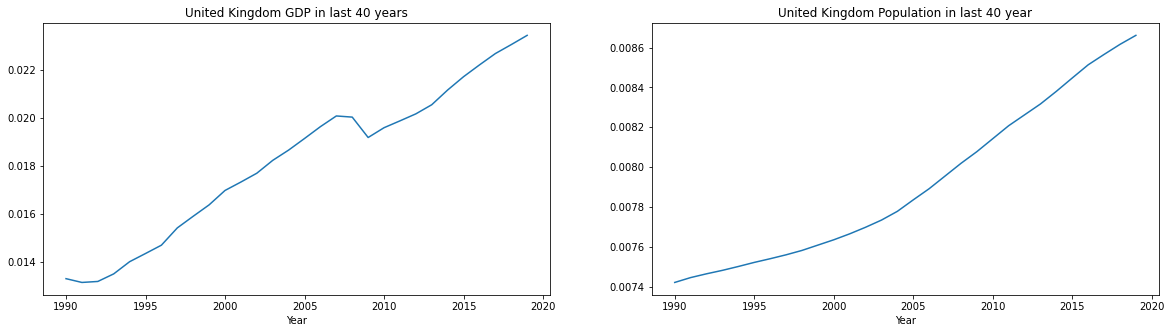

In [132]:
# Before Adjustment
ax = plt.subplot(1, 2, 1)
df1[df1['Country'] == 'United Kingdom'].plot(x='Year', y='GDP', legend=None, ax=ax, figsize=(20, 5), title='United Kingdom GDP in last 40 years');

ax = plt.subplot(1, 2, 2)
df1[df1['Country'] == 'United Kingdom'].plot(x='Year', y='Population', legend=None, ax=ax, figsize=(20, 5), title='United Kingdom Population in last 40 year');

# China GDP in last 30 years vs China Population in last 30 year

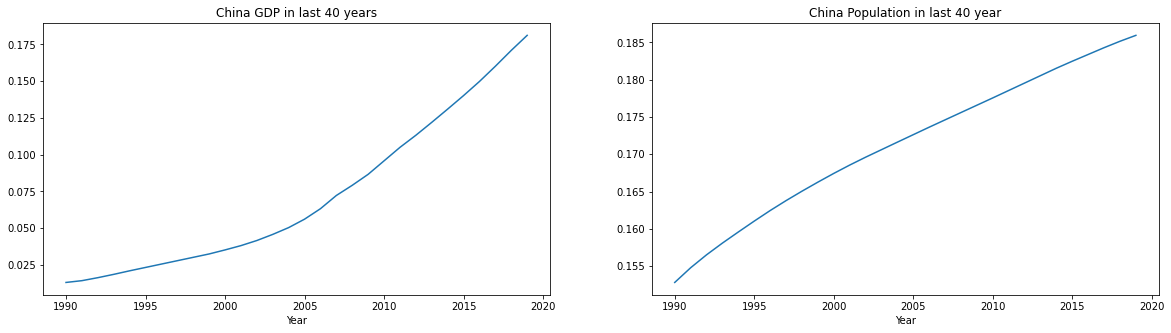

In [133]:
# Before Adjustment
ax = plt.subplot(1, 2, 1)
df1[df1['Country'] == 'China'].plot(x='Year', y='GDP', legend=None, ax=ax, figsize=(20, 5), title='China GDP in last 40 years');

ax = plt.subplot(1, 2, 2)
df1[df1['Country'] == 'China'].plot(x='Year', y='Population', legend=None, ax=ax, figsize=(20, 5), title='China Population in last 40 year');

# K-Means Clustering for China and UK

In [158]:
China1 = df1[df1['Country'] == 'China']
UK = df1[df1['Country'] == 'United Kingdom']

In [231]:
x = China1.iloc[:,4:7] # 1t for rows and second for columns
y = UK.iloc[:,4:7]

# Applying PCA

In [241]:
pca = PCA(3)
 
#Transform the data
df = pca.fit_transform(x)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)

# Cluster Shows that China GPA Increase with Population of Country

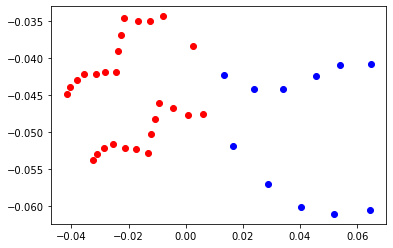

In [242]:
#filter rows of original data
filtered_label2 = df[label == 0]
 
filtered_label8 = df[label == 5]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'blue')
plt.show()

In [237]:
pca = PCA(3)
 
#Transform the data
df = pca.fit_transform(y)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)

# Cluster Shows that UK GPA Increase with Population of Country

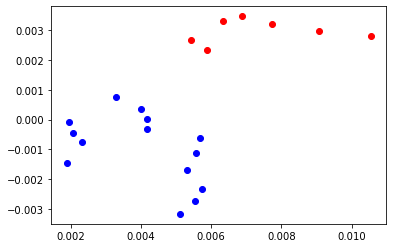

In [238]:
#filter rows of original data
filtered_label2 = df[label == 0]
 
filtered_label8 = df[label == 5]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'blue')
plt.show()

Part II

# Curve Fitting

Curve fitting is the way we model or represent a data spread by assigning a ‘best fit‘ function (curve) along the entire range. Ideally, it will capture the trend in the data and allow us to make predictions of how the data series will behave in the future

In [276]:
MRT_filtered.head()

,Country Name,Country Code,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
8,China,ABW,SH.DYN.MORT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
84,China,AFE,SH.DYN.MORT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,78.250071,74.816673,71.794958,69.138157,66.515928,64.243994,62.072936,60.054150,58.158650,0.0
160,China,AFG,SH.DYN.MORT,358.2,352.2,346.3,340.6,335.1,329.8,324.4,...,80.300000,76.900000,73.600000,70.400000,67.500000,64.800000,62.300000,60.100000,58.000000,0.0
236,China,AFW,SH.DYN.MORT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,114.997108,112.191190,109.696287,107.291693,104.637694,102.032086,99.291140,96.494289,93.627023,0.0
312,China,AGO,SH.DYN.MORT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,105.100000,98.500000,92.900000,88.100000,84.100000,80.600000,77.300000,74.200000,71.500000,0.0


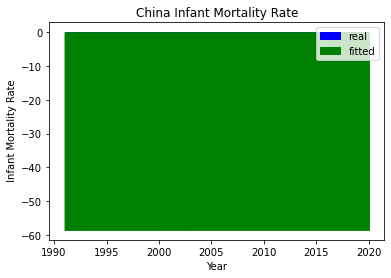

In [280]:
from scipy.optimize import curve_fit

# PREPARING THE TIME SERIES DATA ON INFANT MORTALITY RATE
DEU_MRT = MRT_filtered[MRT_filtered['Country Name'] == 'China'].drop(['Country Name', 'Country Code'], axis=1).values[0][1:61].astype('float')

years = np.arange(1961,2021,1)
years_10 = np.arange(2022,2033, 1)

# Define an objective function for population growth rate of Germany
def objective_DEU(x, a, b, c, d, e):
    return a*x**3 - b*x**d + x*e

# Define an objective function for population growth rate of BRAZIL
def objective_BRA(x,a,b):
    return a*x + b

# A function for calculating the error between the real and predicted value
def get_loss(y, ypred):
    return y-ypred

# fitting to find the best curve for Germany Population Growth
def fit_DEU(x, y): 
    popt, _ = curve_fit(objective_DEU, years, DEU_MRT)
    a, b, c, d, e= popt
    y_fitted = objective_DEU(years, a, b, c, d, e)
    return y_fitted

# fitting to find the best curve for Brazil Population Growth Rate
def fit_BRA(x, y):
    popt, _ = curve_fit(objective_BRA, years, BRA_MRT)
    a, b = popt
    y_fitted = objective_BRA(years, a, b)
    return y_fitted

# fitted population growth rate for Germany
DEU_MRT_fitted = fit_DEU(years, DEU_MRT)
# fitted population growth rate for Brazil
BRA_MRT_fitted = fit_BRA(years, BRA_MRT)

 
def plot_area(
        x, 
        y, 
        yhat, 
        title, 
        xlabel, 
        ylabel, label1="real", label2="fitted", label3="loss"):
  fig,ax = plt.subplots()
  ax.set_title(title)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.fill_between(x,y,0, color='b', label=label1)
  ax.fill_between(x, yhat,y, color='g', label=label2)
  plt.legend()
  plt.show()
  
# An area plot of the two time series for the last 30 years
plot_area(
    years[-30:], 
    DEU_MRT[-30:], 
    DEU_MRT_fitted[-30:], 
    "China Infant Mortality Rate", 
    "Year", 
    " Infant Mortality Rate")

# ERROR RANGES FOR CHINA INFANT MORTALITY RATE

We choose China for the sake of brevity

In [282]:
def plot_limits(x,y,lower,upper,title,xlabel,ylabel,label1="actual",label2="lower",label3="upper"):
    fig,ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.fill_between(x,y,lower,color="g",label=label1)
    ax.fill_between(x, lower,0,color="r", label=label2)
    ax.fill_between(x, upper,y, color="b", label=label3)
    plt.legend()
    plt.show()

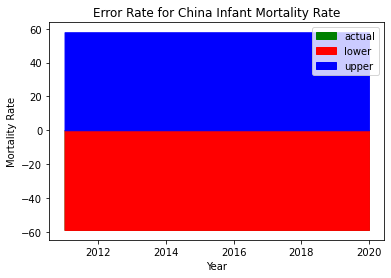

In [295]:
sigma_DEU = get_loss(DEU_MRT[-10:], DEU_MRT_fitted[-10:]) # losses
limit_offset = 0.5


def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """

    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
        
    plot_limits(
        years[-10:], 
        param, 
        lower, upper, 
        "Error Rate for China Infant Mortality Rate", 
        "Year", "Mortality Rate" )   
        
    return lower, upper   


def func(x, *args):
  lower = []
  for y in args:
    lower.append(y-x)
  return lower

 
lower_DEU, upper_DEU = err_ranges(limit_offset, func, DEU_MRT[-10:], sigma_DEU)

In [247]:
df1.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
13860,World,all_energy_types,1990,0.588333,0.585175,0.385541,0.686261,0.058613,0.043025,6.226970e-01
13861,World,coal,1990,0.159732,0.162076,0.385541,0.686261,0.058613,0.043025,2.587689e-01
13862,World,natural_gas,1990,0.125226,0.123809,0.385541,0.686261,0.058613,0.043025,1.103092e-01
13863,World,petroleum_n_other_liquids,1990,0.226707,0.222729,0.385541,0.686261,0.058613,0.043025,2.536192e-01
13864,World,nuclear,1990,0.034132,0.033290,0.385541,0.686261,0.058613,0.043025,1.441684e-07


In [309]:
X=df1[['Energy_consumption','Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita','Energy_intensity_by_GDP']]
y=df1['CO2_emission']

# Linear Regression Model

In [316]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [317]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [318]:
print(regressor.coef_)

[ 1.15420535e+00 -8.52977100e-02 -2.94155806e-02  1.38137946e-02
 -7.32828945e-04  2.10544318e-03]


In [319]:
y_pred = regressor.predict(X_test)

# Prediction for test dataset

In [315]:
y_pred

array([-0.00034405, -0.00032723, -0.00036994, ...,  0.00226961,
       -0.00047969, -0.00033541])